# Univariate Colormaps 

Univariate colormaps are essential for visualizing scalar data in a meaningful way. 

pycolorbar holds a colormap registry making it easy to work with a consistent set of colormap across different visualizations. The colormaps configurations can be saved into YAML files and re-used/re-registered across various projects. 

In this tutorial, we'll explain how to utilize the pycolorbar package to define, manipulate, validate and register the colormaps configurations.

### Colormap configuration

A univariate colormap is defined by its colors palette and the way the colors are assigned to the data.
The parameters required to define a colormap are:

- `colormap_type`: Type of colormap. Allowed names are [LinearSegmentedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.LinearSegmentedColormap.html) and [ListedColormap](https://matplotlib.org/stable/api/_as_gen/matplotlib.colors.ListedColormap.html).
- `color_space`: Describes the color space (e.g., `rgb`, `rgba`, `hex`, `name`, `hsv`) of the `color_palette`.
- `color_palette`: An array or list of colors that compose the colormap.

------------------------------------------------------------------------------------------------------------------------------------
 

We will now explore how to utilize the pycolorbar package to register, manage, validate, and visualize univariate colormaps.

First of all, let's start by importing the necessary functions and libraries

In [ ]:
import os
from pprint import pprint

import pycolorbar

### Register configurations


To get started, let's explore what colormaps are available in the registry:

In [ ]:
# List all registered colormaps in pycolorbar
available_colormaps = pycolorbar.colormaps.names
print("Available colormaps:", available_colormaps)

Available colormaps: []


Now let's specify the directory where we have saved our colormap configuration YAML files. 
For illustrative purposes, we here use the pycolorbar software directory wherein we have curated a selection of sample colormaps configurations.

In [ ]:
# Specify the directory containing colormap configuration YAML files

# dst_dir = "/path/to/your/colormap/configs"
dst_dir = os.path.join(pycolorbar.etc_directory, "colormaps")  # example colormaps directory in pycolorbar

To register all colormap configuration YAML files located within a specified directory, you can use `pycolorbar.register_colormaps`:

In [ ]:
# Register all colormap configuration YAML files located in a directory
pycolorbar.register_colormaps(dst_dir)

# Verify the colormaps are registered
print("Colormaps after registration:", pycolorbar.colormaps.names)

Colormaps after registration: ['IMERG_Liquid', 'IMERG_Solid', 'STEPS-BE', 'STEPS-BOM-RF3', 'STEPS-MCH', 'STEPS-NL']


If when we register new colormaps we are overwriting pre-registered colormaps, by default pycolorbar raise a warning: 

In [ ]:
pycolorbar.register_colormaps(dst_dir)

To silence the warning, you can specify the argument `verbose=False`

In [ ]:
pycolorbar.register_colormaps(dst_dir, verbose=False)

To instead unallow overwriting, you can specify the argument `force=False`. If an existing colormap is gonna to be overwritten, an informative error is raised.

In [ ]:
# pycolorbar.register_colormaps(dst_dir, force=False)

If you aim to register only a specific colormap configuration YAML file, you can use the `pycolorbars.register_colormap` function:

In [ ]:
# Retrieve the filepath for a registered colormap's configuration with:
cmap_filepath = pycolorbar.colormaps.get_cmap_filepath("STEPS-MCH")
print("Colormap configuration filepath:", cmap_filepath)

# Now let's register a single colormap configuration YAML file
pycolorbar.register_colormap(cmap_filepath)

Colormap configuration filepath: /home/ghiggi/Python_Packages/pycolorbar/pycolorbar/etc/colormaps/precipitation/STEPS-MCH.yaml


### Unregister configurations

If you need to remove a colormap from the registry, you can use the `unregister` method:

In [ ]:
# Unregister a specific colormap
pycolorbar.colormaps.unregister("STEPS-MCH")

# Check the current list of registered colormaps
print("Colormaps after unregistering 'STEPS-MCH':", pycolorbar.colormaps.names)

Colormaps after unregistering 'STEPS-MCH': ['IMERG_Liquid', 'IMERG_Solid', 'STEPS-BE', 'STEPS-BOM-RF3', 'STEPS-NL']


### Reset the registry

You can reset the colormap registry with: 

In [ ]:
pycolorbar.colormaps.reset()
print("Colormaps after resetting the registry:", pycolorbar.colormaps.names)

Colormaps after resetting the registry: []


In [ ]:
# Now let's register the colormaps to continue with the tutorial
pycolorbar.register_colormaps(dst_dir)

### Read configurations

Now let's have a look on how to read a colormap configuration YAML file into a python dictionary.

The `read_yaml` provides the "raw" colormap dictionary, while the `read_cmap_dict` function provides the pycolorbar validated colormap dictionary.

In [ ]:
from pycolorbar.settings.colormap_io import read_cmap_dict
from pycolorbar.utils.yaml import read_yaml

In [ ]:
# Read the raw dictionary
cmap_dict = read_yaml(cmap_filepath)
pprint(cmap_dict)

{'auxiliary': {'category': ['MeteoSwiss', 'precipitation']},
 'color_palette': ['#9c7e94',
                   '#640064',
                   '#AF00AF',
                   '#DC00DC',
                   '#3232C8',
                   '#0064FF',
                   '#009696',
                   '#00C832',
                   '#64FF00',
                   '#96FF00',
                   '#C8FF00',
                   '#FFFF00',
                   '#FFC800',
                   '#FFA000',
                   '#FF7D00',
                   '#E11900'],
 'color_space': 'hex',
 'colormap_type': 'LinearSegmentedColormap'}


In [ ]:
# Read the validated dictionary
# - Note the added defaults arguments 'n' and 'segmentdata' set to None.
cmap_dict = read_cmap_dict(cmap_filepath)
pprint(cmap_dict)

{'auxiliary': {'category': ['MeteoSwiss', 'precipitation']},
 'color_palette': array(['#9c7e94', '#640064', '#AF00AF', '#DC00DC', '#3232C8', '#0064FF',
       '#009696', '#00C832', '#64FF00', '#96FF00', '#C8FF00', '#FFFF00',
       '#FFC800', '#FFA000', '#FF7D00', '#E11900'], dtype='<U7'),
 'color_space': 'hex',
 'colormap_type': 'LinearSegmentedColormap',
 'n': 256,
 'segmentdata': None}


The colormap dictionary can also be retrieved directly from the colormaps registry:

In [ ]:
cmap_dict = pycolorbar.colormaps.get_cmap_dict("STEPS-MCH")

In [ ]:
pprint(cmap_dict)

{'auxiliary': {'category': ['MeteoSwiss', 'precipitation']},
 'color_palette': array(['#9c7e94', '#640064', '#AF00AF', '#DC00DC', '#3232C8', '#0064FF',
       '#009696', '#00C832', '#64FF00', '#96FF00', '#C8FF00', '#FFFF00',
       '#FFC800', '#FFA000', '#FF7D00', '#E11900'], dtype='<U7'),
 'color_space': 'hex',
 'colormap_type': 'LinearSegmentedColormap',
 'n': 256,
 'segmentdata': None}


### Add temporary configurations

The colormap registry `add_cmap_dict` allows to temporary add colormap configurations to the registry.

In [ ]:
pycolorbar.colormaps.add_cmap_dict(cmap_dict, name="CUSTOM_COLORMAP")

In [ ]:
# Let's check the custom colormap dictionary has been added to the registry
assert "CUSTOM_COLORMAP" in pycolorbar.colormaps

### Validate configurations
If you aims to define your own colormap configuration dictionary, you can validate it with:

In [ ]:
validated_cmap_dict = pycolorbar.validate_cmap_dict(cmap_dict)

To validate the registered colormap configurations you can use the `pycolorbar.colormaps.validate` method.

In [ ]:
pycolorbar.colormaps.validate("CUSTOM_COLORMAP")  # validate a specific colormap
pycolorbar.colormaps.validate()  # validate all colormaps in the registry

### Save configurations
Every pycolorbar colormap has a corresponding YAML configuration file to disk.
**The name of each YAML file corresponds to the name of the colormap registered in pycolorbar**.

You can save a colormap configuration to disk with:

In [ ]:
filepath = "/tmp/CUSTOM_COLORMAP.yaml"
pycolorbar.colormaps.to_yaml(name="CUSTOM_COLORMAP", filepath=filepath, force=True)

In [ ]:
# Let's check the written YAML file
cmap_dict = read_yaml(filepath)
pprint(cmap_dict)

{'auxiliary': {'category': ['MeteoSwiss', 'precipitation']},
 'color_palette': ['#9c7e94',
                   '#640064',
                   '#AF00AF',
                   '#DC00DC',
                   '#3232C8',
                   '#0064FF',
                   '#009696',
                   '#00C832',
                   '#64FF00',
                   '#96FF00',
                   '#C8FF00',
                   '#FFFF00',
                   '#FFC800',
                   '#FFA000',
                   '#FF7D00',
                   '#E11900'],
 'color_space': 'hex',
 'colormap_type': 'LinearSegmentedColormap',
 'n': 256.0,
 'segmentdata': None}


### Retrieve the colormaps

To retrieve the matplotlib colormap corresponding to a pycolorbar configuration, you just need to call the `get_cmap` function.

In [ ]:
cmap = pycolorbar.get_cmap("STEPS-MCH")
cmap

Note that the `get_cmap`methods also allow to retrieve the available matplotlib colormaps.

In [ ]:
cmap = pycolorbar.get_cmap("Spectral")
cmap

Moreover, you can also revert the colormap by adding the suffix `_r` the colormap name and resample the colormap look-up-table:

In [ ]:
cmap = pycolorbar.get_cmap("STEPS-MCH_r", lut=10)
cmap

You can also visualize the colormap with:

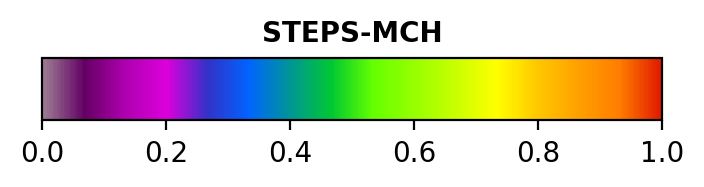

In [ ]:
pycolorbar.show_colormap("STEPS-MCH")

### Colormaps categories
pycolorbar provides a way to retrieve a custom selection of registered colormaps according to the categories specified in the `auxiliary/category` field of the colormap YAML configuration file.

For example, the "STEPS-MCH" has the categories `['MeteoSwiss', 'precipitation']` indicating the type and use of the colormap.

In [ ]:
cmap_dict = pycolorbar.colormaps.get_cmap_dict("STEPS-MCH")
pprint(cmap_dict)

{'auxiliary': {'category': ['MeteoSwiss', 'precipitation']},
 'color_palette': array(['#9c7e94', '#640064', '#AF00AF', '#DC00DC', '#3232C8', '#0064FF',
       '#009696', '#00C832', '#64FF00', '#96FF00', '#C8FF00', '#FFFF00',
       '#FFC800', '#FFA000', '#FF7D00', '#E11900'], dtype='<U7'),
 'color_space': 'hex',
 'colormap_type': 'LinearSegmentedColormap',
 'n': 256,
 'segmentdata': None}


With the `available_colormaps` function we can retrieve the list of colormaps belonging to a given category: 

In [ ]:
pycolorbar.available_colormaps("precipitation")

['CUSTOM_COLORMAP',
 'IMERG_Liquid',
 'IMERG_Solid',
 'STEPS-BOM-RF3',
 'STEPS-MCH']

while with `show_colormaps` we can visualize a selection of registered pycolorbar colormaps:

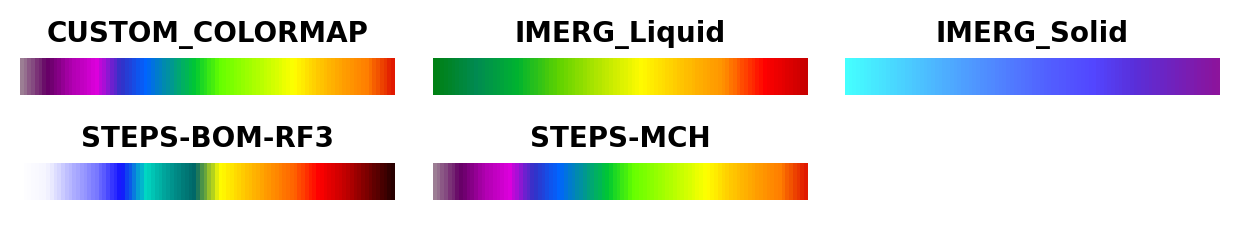

In [ ]:
pycolorbar.show_colormaps(category="precipitation")

or all the registered pycolorbar colormaps:

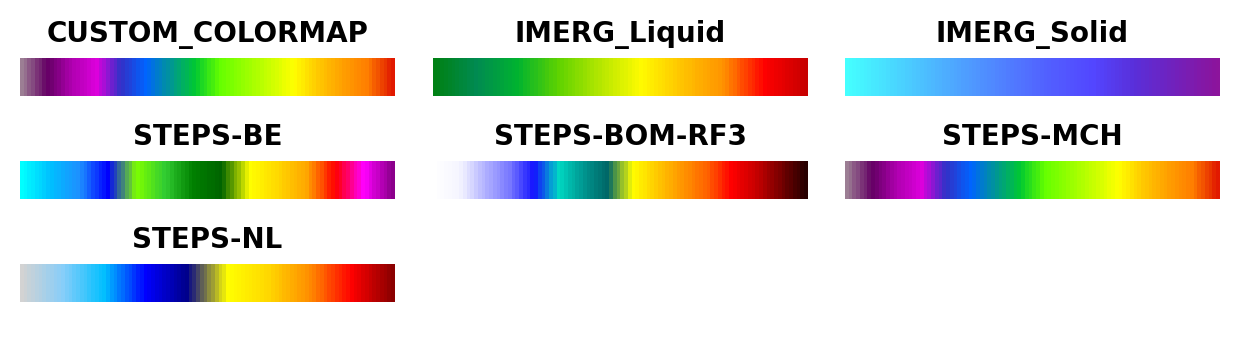

In [ ]:
pycolorbar.show_colormaps(category="pycolorbar")

We also provide a way a quick way to list and visualize registered matplotlib and pycolorbar colormaps based on their characteristics. 
Some relevant categories are `perceptual`, `sequential`, `diverging`, `qualitative` and `cyclic`colormaps.

If you aim to contribute colormaps to pycolorbar, please consider to add the relevant categories to the
`auxiliary/category`field of the colormap configuration YAML file. 
 

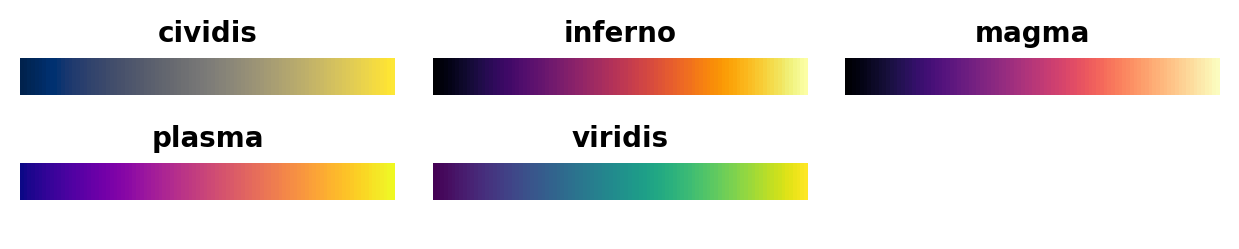

In [ ]:
pycolorbar.available_colormaps(category="perceptual")
pycolorbar.show_colormaps(category="perceptual")

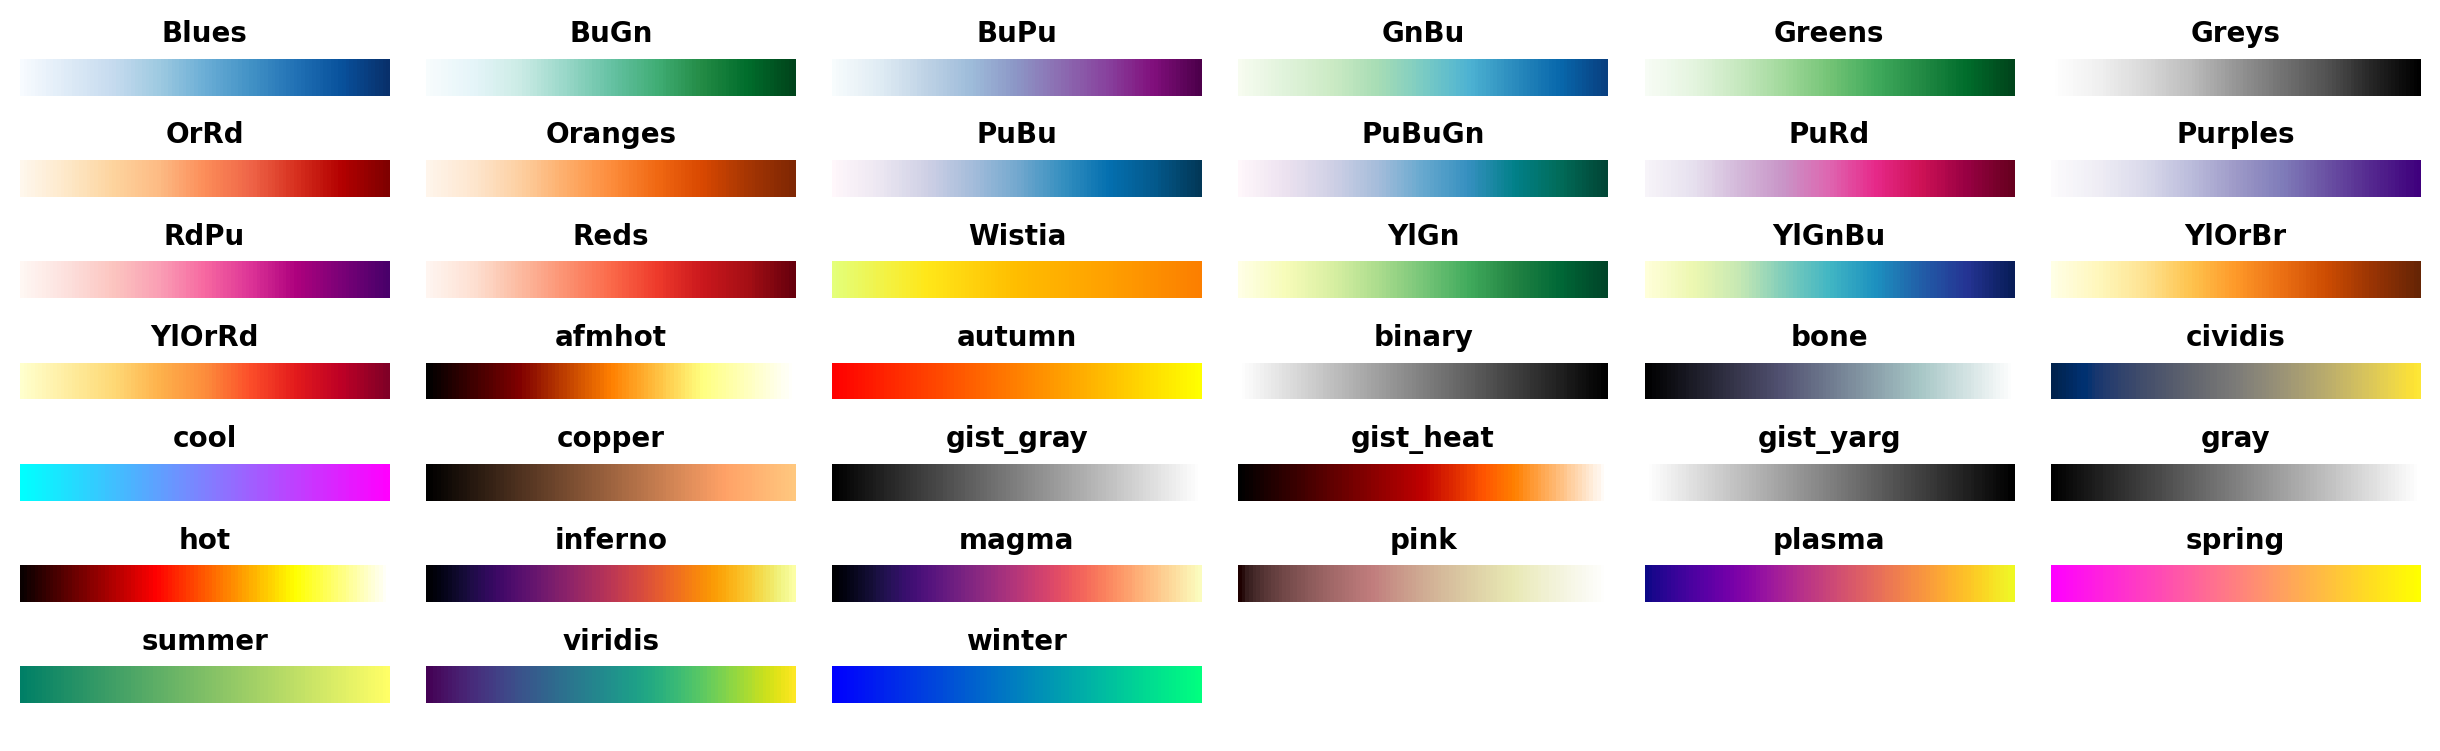

In [ ]:
pycolorbar.available_colormaps(category="sequential")
pycolorbar.show_colormaps(category="sequential")

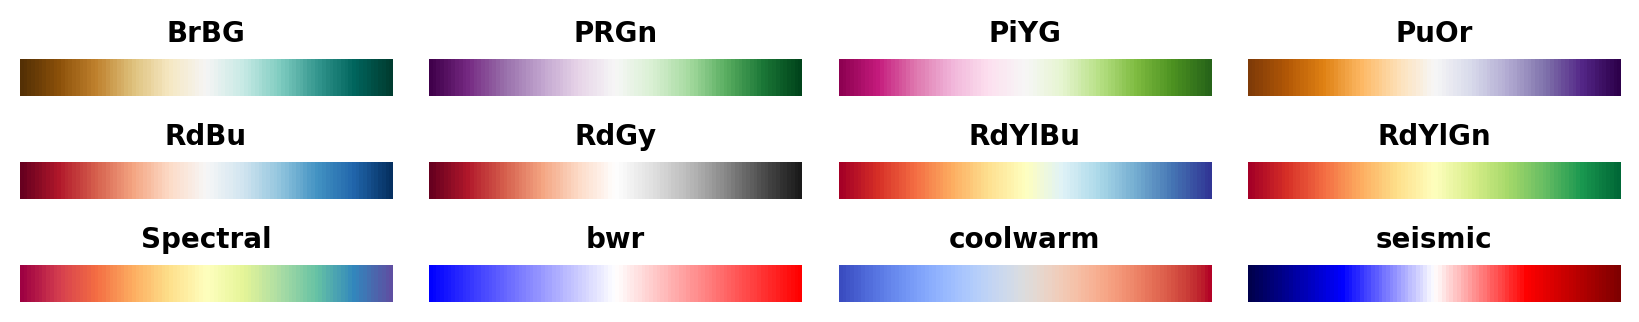

In [ ]:
pycolorbar.available_colormaps(category="diverging")
pycolorbar.show_colormaps(category="diverging")

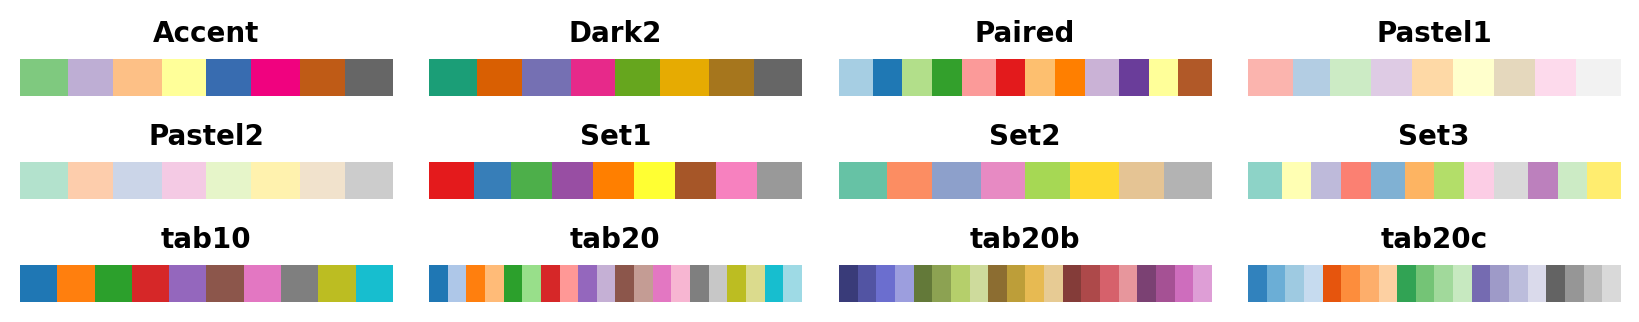

In [ ]:
pycolorbar.available_colormaps(category="qualitative")
pycolorbar.show_colormaps(category="qualitative")

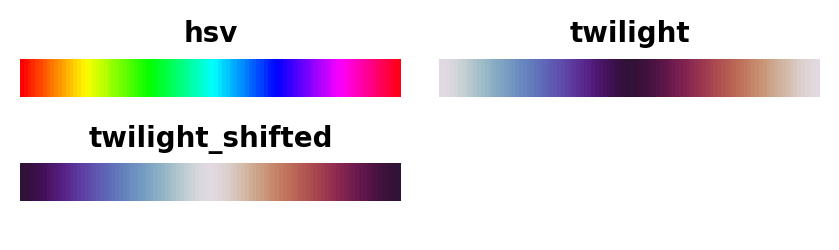

In [ ]:
pycolorbar.available_colormaps(category="cyclic")
pycolorbar.show_colormaps(category="cyclic")